# Data Analytics and Classification Model for Failure Detection of Wind Turbine from IIoT Data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#os.getcwd() = TEAM-2-2024Fall/eda



../data/raw\fault.csv
../data/raw\scada.csv
../data/raw\status.csv


In [24]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, classification_report
# from lightgbm import LGBMClassifier

%config InlineBackend.figure_format = 'retina'

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\teren\anaconda3\envs\tt_1113\lib\site-packages\sklearn\metrics\__init__.py)

# 1. Read data

We have 3 data:

* `scada_data.csv`: Contains >60 information (or status) of wind turbine components recorded by SCADA system
* `fault_data.csv`: Contains wind turbine fault types (or modes)
* `status_data.csv`: Contains description of status of wind turbine operational

In [ ]:
# acess the raw data file in data/raw
if os.getcwd()[-1] != 'raw':
    print('not there yet')
    print(os.getcwd()[-3:])

not there yet
raw


In [39]:
print(os.getcwd())
#
import os

TO_DATA_FOLDER = '../data/raw/'
#os.chdir(TO_DATA_FOLDER)
print(os.getcwd())
print(os.listdir())


scada_df = pd.read_csv('scada.csv')
scada_df['DateTime'] = pd.to_datetime(scada_df['DateTime'], format = "%m/%d/%Y %H:%M")
scada_df.set_index('DateTime', inplace=True)

scada_df

c:\Users\teren\OneDrive\桌面\Rice\Course\2024Fall\BUSI7QuantitativeResearch\1117github\Team-2-2024Fall\data\raw
c:\Users\teren\OneDrive\桌面\Rice\Course\2024Fall\BUSI7QuantitativeResearch\1117github\Team-2-2024Fall\data\raw
['fault.csv', 'scada.csv', 'status.csv']


,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-05-01 00:00:00,1398920448,0,6.9,9.4,2.9,0.00,0.02,0.00,0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:09:00,1398920960,0,5.3,8.9,1.6,0.00,0.01,0.00,0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:20:00,1398921600,0,5.0,9.5,1.4,0.00,0.04,0.00,0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:30:00,1398922240,0,4.4,8.3,1.3,0.00,0.08,0.00,0,0,...,23,21,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:39:00,1398922752,0,5.7,9.7,1.2,0.00,0.05,0.00,0,0,...,23,21,25,12,14,23,34,2501,25.272728,1.103713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,1428553216,0,3.9,5.5,2.2,6.75,7.40,6.01,147,277,...,33,23,28,9,17,27,35,3050,24.454546,3.474583
2015-04-08 23:30:00,1428553856,0,3.9,5.6,2.9,6.64,7.06,6.33,128,191,...,34,23,28,9,17,27,35,3050,24.454546,3.445683
2015-04-08 23:39:00,1428554368,0,4.2,6.7,2.6,7.18,8.83,6.22,163,329,...,34,23,28,9,18,27,34,3050,24.363636,3.413876


In [41]:
status_df = pd.read_csv('status.csv')
status_df['Time'] = pd.to_datetime(status_df['Time'])
status_df.rename(columns={'Time': 'DateTime'}, inplace=True)
status_df.set_index('DateTime', inplace=True)

status_df

,Main Status,Sub Status,Full Status,Status Text,T,Service,FaultMsg,Value0
DateTime,,,,,,,,
2014-04-24 12:37:38,0,0,0 : 0,Turbine in operation,1,False,False,7.4
2014-04-25 19:27:24,71,104,71 : 104,Insulation monitoring : Insulation fault Phase U2,6,False,True,20.5
2014-04-26 09:30:13,8,0,8 : 0,Maintenance,6,True,False,17.1
2014-04-26 10:05:19,8,0,8 : 0,Maintenance,6,False,False,8.7
2014-04-26 10:05:25,8,0,8 : 0,Maintenance,6,True,False,10.6
...,...,...,...,...,...,...,...,...
2015-04-27 07:26:51,0,0,0 : 0,Turbine in operation,1,False,False,7.0
2015-04-28 22:14:25,26,373,26 : 373,Malfunction fan-inverter : Other control board...,6,False,False,8.1
2015-04-28 22:14:53,0,2,0 : 2,Turbine operational,1,False,False,9.5


In [43]:
fault_df = pd.read_csv('fault.csv')
fault_df['DateTime'] = pd.to_datetime(fault_df['DateTime'])
fault_df.set_index('DateTime', inplace=True)

fault_df

,Time,Fault
DateTime,,
2014-05-14 14:39:44,1.400096e+09,GF
2014-05-14 14:50:24,1.400097e+09,GF
2014-05-14 14:58:56,1.400098e+09,GF
2014-05-14 15:09:36,1.400098e+09,GF
2014-05-14 15:20:16,1.400099e+09,GF
...,...,...
2015-01-14 23:00:48,1.421298e+09,AF
2015-01-14 23:09:20,1.421299e+09,AF
2015-01-15 22:50:08,1.421384e+09,AF


In the fault data, there are 5 types of faults, or fault modes:

* gf: generator heating fault
* mf: mains failure fault
* ff: feeding fault
* af: air cooling fault
* ef: excitation fault

I don't know exactly what these are. The source of these fault modes in this [GitHub](https://github.com/lkev/wt-fdd).

In [52]:

scada_df.describe()

,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
count,4.902700e+04,49027.000000,49027.000000,49027.000000,49027.000000,49027.00000,49027.000000,49027.000000,49027.000000,49027.000000,...,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000
mean,1.413762e+09,0.938748,6.874626,9.340286,12.244133,8.67852,9.547354,8.515034,942.261244,1214.015400,...,30.335958,24.320211,28.802456,13.380219,23.116303,31.766537,43.992596,2988.628184,27.828410,1.855781
std,8.559693e+06,14.442141,3.694776,5.157448,223.186866,4.14345,4.482192,22.394531,1008.930159,1168.858993,...,5.623608,4.918045,5.185007,5.246230,6.360604,6.381892,10.404843,172.074485,5.595795,1.269928
min,1.398920e+09,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,-14.000000,0.000000
25%,1.406352e+09,0.000000,4.200000,5.800000,2.600000,6.33000,6.740000,5.880000,87.000000,138.000000,...,26.000000,20.000000,25.000000,9.000000,19.000000,27.000000,37.000000,3050.000000,24.363636,1.206045
50%,1.413706e+09,0.000000,6.500000,8.600000,4.400000,8.97000,10.060000,7.850000,536.000000,802.000000,...,30.000000,25.000000,29.000000,13.000000,24.000000,33.000000,43.000000,3050.000000,28.454546,1.566699
75%,1.421179e+09,0.000000,8.900000,11.700000,6.300000,11.92000,13.550000,10.390000,1551.000000,2326.000000,...,34.000000,28.000000,33.000000,17.000000,28.000000,36.000000,48.000000,3050.000000,31.818182,2.370270
max,1.428556e+09,246.000000,32.099998,51.099998,6553.500000,14.73000,18.910000,655.349976,3071.000000,3216.000000,...,49.000000,38.000000,44.000000,35.000000,36.000000,45.000000,71.000000,3050.000000,42.545456,23.512859


# 2. Time series analysis

The 3 data have different time spans. The status data has the longest record timespan from January 2014 to December 2015. The shortest is SCADA data from April 2014 to April 2015. Therefore, when seeing the SCADA records, we can refer to status and fault data to see what happens on the turbine at certain timestamps.

(0.0, 4.0)

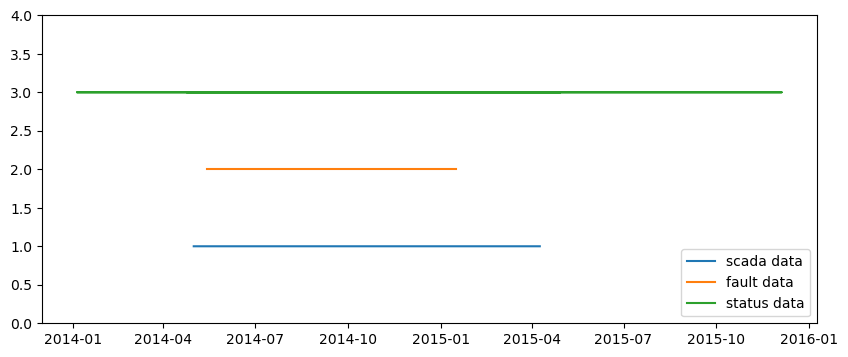

In [45]:
# Plot time span of all data
t_scada = scada_df.index
t_fault = fault_df.index
t_status = status_df.index

plt.figure(figsize=(10,4))
plt.plot(t_scada, np.full(len(scada_df), 1), label='scada data')
plt.plot(t_fault, np.full(len(fault_df), 2), label='fault data')
plt.plot(t_status, np.full(len(status_df), 3), label='status data')
plt.legend(loc='lower right')
plt.ylim(0,4)

<Axes: xlabel='DateTime'>

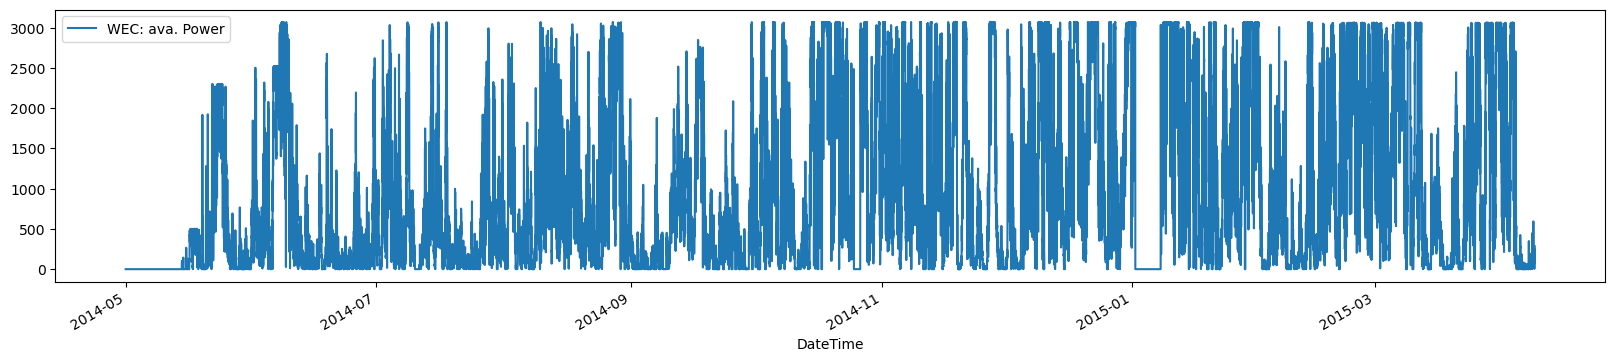

In [59]:
# Plot of max power from SCADA data
scada_df.plot(y='WEC: ava. Power', figsize=(20,4))

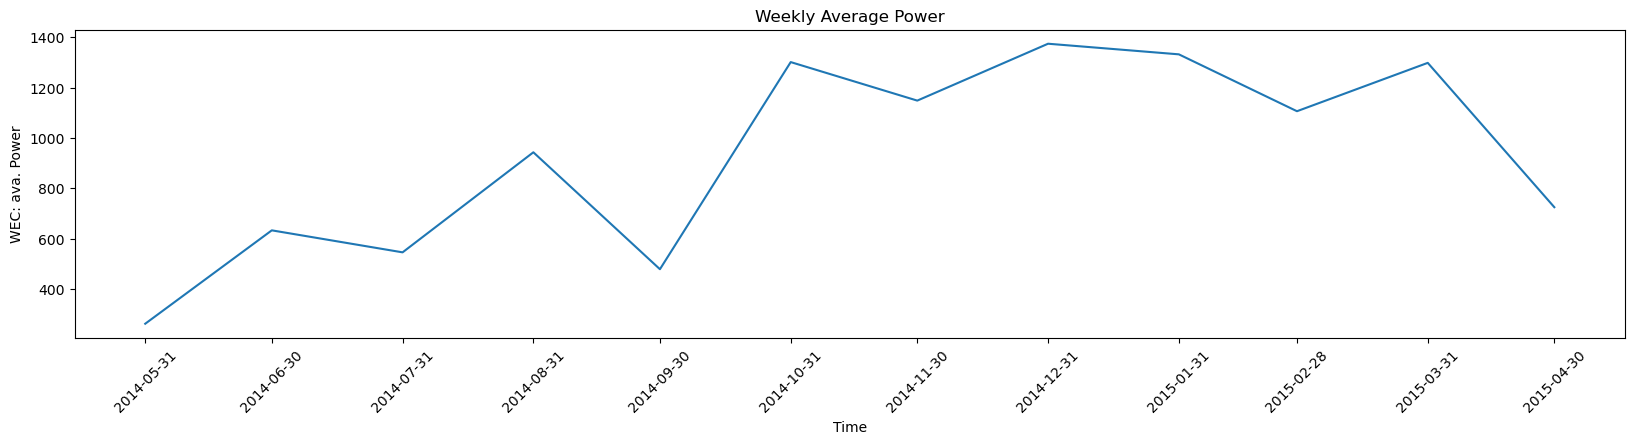

In [68]:
# Plot of avg power output generated by the wind turbine on a weekly basis

weekly_scada_df = scada_df.resample("M").mean()
plt.figure(figsize=(20, 4))
plt.plot(weekly_scada_df.index, weekly_scada_df['WEC: ava. Power'])

# Customize x-axis labels
plt.xticks(weekly_scada_df.index, rotation=45)

# Set x-axis label
plt.xlabel('Time')
# Set y-axis label
plt.ylabel('WEC: ava. Power')
plt.title('Weekly Average Power')

plt.show()

From the above graph, we notice that from October to March, we can observe a rising trend of power generated by wind turbine and stay on a high pleatue
There were times when power dropped, for example in October 2014, December 2014, and the most significant in January 2015.

In [ ]:
# Plot of power production on monthly resampled data
y = 'WEC: Production kWh'
scada_df.resample('D', on='DateTime').mean().plot(y=y, figsize=(15,4))

The number of wind turbine faults significantly increases on October 2014.

In [ ]:
# Plot of number of faults on monthly resampled data
fault_df.resample('M', on='DateTime').Fault.count().plot.bar()

In [ ]:
fault_df.resample('M', on='DateTime').Fault.value_counts()

Let's plot the faults grouped by its fault modes. There are lots of EF events in October and November 2014, and lots of FF events from October 2014 - January 2015.

In [ ]:
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month

In [ ]:
c = ['red', 'orange', 'green', 'blue', 'violet']
fault_df.resample('M', on='DateTime').Fault.value_counts().unstack().plot.bar(stacked=True, width=0.8, figsize=(10,5), color=c, rot=45,
                                                                              title='Wind Turbine Faults', ylabel='Fault Counts')

# 3. Combine SCADA and faults data

We combine SCADA and fault data to pair each measurements with associated faults.

In [ ]:
# Combine scada and fault data
df_combine = scada_df.merge(fault_df, on='Time', how='outer')
msno.matrix(df_combine)

There are lots of NaNs, or unmatched SCADA timestamps with fault timestamps, simply because there are no faults happen at certain time. For these NaNs, we will replace with "NF".

**NF is No Fault (normal condition)**

In [ ]:
# Replace records that has no fault label (NaN) as 'NF' (no fault)
df_combine['Fault'] = df_combine['Fault'].replace(np.nan, 'NF')

df_combine

# 4. Exploratory Data Analysis

Print the averages of SCADA values grouped by fault modes.

In [ ]:
# Suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Groupby fault and take average
df_summary = df_combine.groupby('Fault').mean().T
df_summary.tail(20)

Seeing the averages above, we could identify the anomalous behavior of Fault Modes:

* WF has lower ava, min, max active reactive power than No Fault (NF)
* EF has higher ava, min, max active reactive power than No Fault (NF)
* GF has ZERO ava, min, max active reactive power
* FF and MF have higher nacelle cable twisting than NF
* AF and GF have negative nacelle cable twisting
* AF and MF have lower production
* All faults have higher blade angle, the highest is FF
* GF in general has the lowest temperature in ALL components (cabinet temp, T spinner, T front bearing, ..., T transformer)
* While other faults (FF, AF, MF, EF) have higher temperature
* EF temperature is highest in cabinet, pitch, rotor, stator, ambient, control, tower, and transformer
* AF temperature is highest in spinner, front bearing, rare bearing, nacelle, main carrier, rectifier, yaw, and fan inverter

The boxplots of temperatures (at spinner, bearing, nacelle, and fan inverter) shows that during GF, the temperatures are anomalously lower than normal condition. However, temperatures are higher than normal during AF and EF.

In [ ]:
# Boxplots of temperature
f, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,8))

sns.boxplot(x='Fault', y='Spinner temp.', data=df_combine, ax=axes[0][0])
axes[0][0].set_title('Spinner Temperature')
sns.boxplot(x='Fault', y='Rear bearing temp.', data=df_combine, ax=axes[0][1])
axes[0][1].set_title('Rear Bearing Temperature')
sns.boxplot(x='Fault', y='Nacelle temp.', data=df_combine, ax=axes[1][0])
axes[1][0].set_title('Nacelle Temperature')
sns.boxplot(x='Fault', y='Fan inverter cabinet temp.', data=df_combine, ax=axes[1][1])
axes[1][1].set_title('Fan Inverter Temperature')

plt.tight_layout()

Boxplot of reactive power (power from the generator?) shows the power during EF is anomalously high, while the power during MF is lower than normal condition. 

In [ ]:
sns.catplot(data=df_combine, x='Fault', y='WEC: ava. reactive Power', kind='box')

The boxplot of nacelle position and cable twisting shows that during AF, nacelle position is negative (up to -500) while during MF, FF, and EF, nacelle position is positive (up to +500).

In [ ]:
sns.catplot(data=df_combine, x='Fault', y='WEC: ava. Nacel position including cable twisting', kind='box')

The boxplot of operating hours shows that during MF and AF, the operating hours are shorter than normal condition. However, during FF, the operating hours are longer than normally are.

In [ ]:
sns.catplot(data=df_combine, x='Fault', y='WEC: Operating Hours', kind='box')

# 5. Data preparation for ML

There are far more records of NF (normal condition) than faulty records - imbalanced dataset. We will sample the No Fault dataframe and pick only 300 records. 

In [ ]:
df_combine.Fault.value_counts()

In [ ]:
# Pick 300 samples of NF (No Fault) mode data
df_nf = df_combine[df_combine.Fault=='NF'].sample(300, random_state=42)

df_nf

In [ ]:
# With fault mode data
df_f = df_combine[df_combine.Fault!='NF']

df_f

In [ ]:
# Combine no fault and faulty dataframes
df_combine = pd.concat((df_nf, df_f), axis=0).reset_index(drop=True)

df_combine

Preparing for the training dataset, we **drop irrelevant features**. First we drop datetime, time, and error columns. Next, features that "de facto" are output of wind turbine, such as power from wind, operating hours, and kWh production, are dropped. Also, climatic variable such as wind speed are not useful.

In [ ]:
# Drop irrelevant features
train_df = df_combine.drop(columns=['DateTime_x', 'Time', 'Error', 'WEC: ava. windspeed',
                                    'WEC: ava. available P from wind',
                                    'WEC: ava. available P technical reasons',
                                    'WEC: ava. Available P force majeure reasons',
                                    'WEC: ava. Available P force external reasons',
                                    'WEC: max. windspeed', 'WEC: min. windspeed',
                                    'WEC: Operating Hours', 'WEC: Production kWh',
                                    'WEC: Production minutes', 'DateTime_y'])

train_df

In [ ]:
# Imbalanced fault modes
train_df.Fault.value_counts().plot.pie(title='Fault Modes')

# 6. Machine learning - fault modes classification

We are going to build a predictive model to classify fault modes of wind turbine based on the information or status of wind turbine components (gear box, tower, nacelle, bearing, etc.) from SCADA system. This is a multiclass classification task.

Because our training data is largely imbalanced for each fault modes, we use **SMOTE** (Synthetic Minority Oversampling Technique) to oversample the minority classes. The classifier that we use is **LightGBM** (Gradient Boosting Machine). To avoid overfitting, we did **Stratified K-Fold** cross-validation with 5-folds. **Multiple scoring metrics** are used: accuracy, macro-averaged precision, macro recall, and macro F1 score.  

**NOTE.** During cross-validation, the train set will be divided into train set and validation set. Therefore, to ensure that the train set is balanced, the SMOTE should be put inside via **pipeline**. If outside, the score result will be unfair (see this [article](https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7)).

In [ ]:
# Feature and target
# X = df_combine.iloc[:,3:-2]
# y = df_combine.iloc[:,-1]
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Make pipeline of SMOTE, scaling, and classifier
pipe = make_pipeline(SMOTE(), StandardScaler(), LGBMClassifier(random_state=42))

# Define multiple scoring metrics
scoring = {
    'acc': 'accuracy',
    'prec_macro': 'precision_macro',
    'rec_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

# Stratified K-Fold
stratkfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Return a dictionary of all scorings
cv_scores = cross_validate(pipe, X_train, y_train, cv=stratkfold, scoring=scoring)

In [ ]:
# Print scoring results from dictionary
for metric_name, metric_value in cv_scores.items():
    mean = np.mean(metric_value)
    print(f'{metric_name}: {np.round(metric_value, 4)}, Mean: {np.round(mean, 4)}')

**The precision, recall, and F1 score are 65%.**

In [ ]:
# Fit pipeline to train set
pipe.fit(X_train, y_train)

# Predict on test set
y_pred = pipe.predict(X_test)

In [ ]:
# Confusion matrix of test set
plot_confusion_matrix(pipe, X_test, y_test, values_format='.5g')
plt.show()

We can see 2 problematic (false predicted) classes here are FF and EF. There are 30 EF predicted as FF, and 26 FF predicted as EF.

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

# 7. Hyperparameter tuning

From our previous LightGBM model, we achieved 65% precision, recall, and F1, however we find 2 problematic classes being falsely predicted. We will improve our model with hyperparameter tuning. We will do grid search over **4 hyperparameters** and optimize the **F1 score** as our metric.

In [ ]:
# Define parameter search grid
param_grid = {'lgbmclassifier__n_estimators': [6, 8, 16, 24],
              'lgbmclassifier__num_leaves': [4, 6, 8],
              'lgbmclassifier__reg_alpha' : [1, 1.5],
              'lgbmclassifier__reg_lambda': [1, 1.5],
              'lgbmclassifier__boosting_type': ['gbdt'] # Gradient Boosting Decision Tree
             }

# Grid search CV
grid = GridSearchCV(pipe, param_grid, verbose=1, cv=stratkfold, n_jobs=-1, scoring='f1_macro')

# Fit grid on train set
grid.fit(X_train, y_train)

We got **improvement to 70% F1-score** with the following tuned hyperparameters.

In [ ]:
# Best model from tuning
print(grid.best_params_)
print(f'Average of Macro F1: {grid.best_score_}')

Using the tuned LightGBM model, we had successfully reduced the false classes i.e. from 30 to only 8 EF classes falsely predicted as FF. 

In [ ]:
# Confusion matrix of test set
plot_confusion_matrix(grid, X_test, y_test, values_format='.5g')
plt.show()

Comparing the present classification report to the previous report, we improved the F1-score of EF class from 46% to 69%, and small improvement of FF class from 62% to 68%.  

In [ ]:
# Classification report
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

With this improvement, however, there remains some issues recommended for **future improvements of this work**:
* Eventhough there is improvement, 26 FF class still falsely predicted as EF
* Score of MF and AF are very low: 13% and 41%

# 8. Conclusion

We analyzed data that comes from the Supervisory Control and Data Acquisition (SCADA) system of a wind turbine from April 2014 until April 2015, with the associated faults that occured during the operating times. The SCADA system gives more than 60 records of all components of the wind turbine such as nacelle, inverter, bearing, and so on. There were 5 fault modes that developed, labeled as FF, AF, EF, MF, and GF. We found out that the number of faults significantly increases in October 2014. 

During faulty times, there are anomalous behaviors of the wind turbine components. For example, during GF, the temperatures of all wind turbine components are lower than during normal conditions. However, temperatures during AF and EF are higher than normal. And then, the reactive power is anomalously high during EF, while power is lower during MF. Therefore, we could classify fault modes based on various SCADA measured components. 

We made an Adaptive Boosting (AdaBoost) based predictive model to classify fault modes. The data is largely imbalanced among fault modes, therefore SMOTE was implemented within a 5-fold CV pipeline. From that attempt, we achieved a macro F1 score of 64-65%. Two problematic classes, EF and FF, were falsely predicted. To correct this and improve the model performance, we performed hyperparameter tuning to tune 4 AdaBoost hyperparameters. After tuning, the macro F1 score improved to 69-70%. The number of false prediction of EF classes successfully reduces. 

The individual F1 scores of AF and MF were still low. Therefore, an improvement of this work is recommended and will be appreciated.

**Thank you!**